In [37]:
 webpack-custom-chunk-id-plugin

NameError: name 'webpack' is not defined

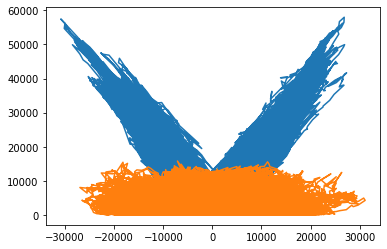

536474


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [43]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
rate, data = wav.read('file_audio.wav')
fft_out = fft(data)
%matplotlib inline
plt.plot(data, np.abs(fft_out))
plt.show()

print(len(fft_out))
print(min(fft_out))
print(max(fft_out))
print(261.6 in fft_out)

In [15]:
import os
os.getcwd()

'C:\\Users\\Vedhanth\\Frequency Seperation'

110250
------------------------------------------------
16000
536474
[[ -139    18]
 [ -215    34]
 [ -196     6]
 ...
 [ -523  -563]
 [ -765  -319]
 [-1002  -190]]
[[ 261  133]
 [ 262  124]
 [ 263  139]
 ...
 [1973  100]
 [1974  110]
 [1975   98]]
<class 'numpy.ndarray'>
(536474, 2)
536474


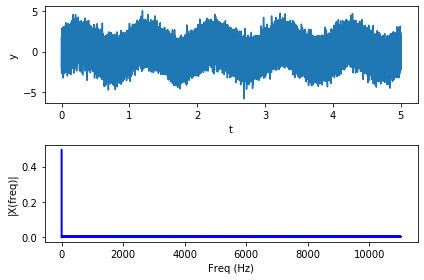

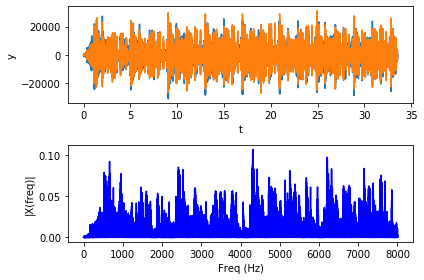

In [44]:
from scipy import fft, arange
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os


def frequency_sepectrum(x, sf):
    """
    Derive frequency spectrum of a signal from time domain
    :param x: signal in the time domain
    :param sf: sampling frequency
    :returns frequencies and their content distribution
    """
    x = x - np.average(x)  # zero-centering

    n = len(x)
    print(n)
    k = arange(n)
    tarr = n / float(sf)
    frqarr = k / float(tarr)  # two sides frequency range

    frqarr = frqarr[range(n // 2)]  # one side frequency range

    x = fft(x) / n  # fft computing and normalization
    x = x[range(n // 2)]

    return frqarr, abs(x)


# Sine sample with a frequency of 1hz and add some noise
sr = 22050  # sampling rate
y = np.linspace(0, 2*np.pi, sr)
y = np.tile(np.sin(y), 5)
y += np.random.normal(0, 1, y.shape)
t = np.arange(len(y)) / float(sr)

plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')

frq, X = frequency_sepectrum(y, sr)

plt.subplot(2, 1, 2)
plt.plot(frq, X, 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('|X(freq)|')
plt.tight_layout()


# wav sample from https://freewavesamples.com/files/Alesis-Sanctuary-QCard-Crickets.wav
here_path = os.getcwd()
wav_file_name = 'file_audio.wav'
wave_file_path = os.path.join(here_path, wav_file_name)
sr, signal = wavfile.read(wave_file_path)
print('------------------------------------------------')
print(sr)
print(len(signal))
print(signal)


subsetter = np.where((signal>=261) & (signal < 1976))
pos_signal = signal[subsetter]

(unique, counts) = np.unique(pos_signal, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

print(type(signal))
print(signal.shape)
y = signal[:]  # use the first channel (or take their average, alternatively)
t = np.arange(len(y)) / float(sr)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')

frq, X = frequency_sepectrum(y, sr)

plt.subplot(2, 1, 2)
plt.plot(frq, X, 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('|X(freq)|')
plt.tight_layout()

plt.show()

In [45]:
N = 8192;
Sample_Rate = 44100;
float[] myAudio = new Float[N];
myAudio = getAudio();
Complex[] myFFT_Audio = FFT(myAudio);  //Returns N complex values

//Get Array of frequency Values
float[] frequencies = new float[N]
for( i = 0 ; i < N; i++)
   { frequencies[i] = i * (Sample_Rate / N) - (Sample_Rate / 2); }

//Get Amplitudes
float[] Amplitudes = new float[N]
for( i = 0; i < N; i++)
  { Amplitudes[i] = myFFT_Audio[i].Magnitude(); }

//Plot Frequencies vs Amplitudes - will plot for frequencies -fs/2 to fs/2
PLOT(frequencies , Amplitudes);

SyntaxError: invalid syntax (<ipython-input-45-0fb5aa5271db>, line 3)

In [46]:
def spectrogram(samples, sample_rate, stride_ms = 10.0, 
                          window_ms = 20.0, max_freq = None, eps = 1e-14):

    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples, 
                                          shape = nshape, strides = nstrides)
    
    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]
    
    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2
    
    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale
    
    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])
    
    # Compute spectrogram feature
    ind = np.where(freqs <= max_freq)[0][-1] + 1
    specgram = np.log(fft[:ind, :] + eps)
    return specgram

In [49]:
import librosa
audio_path = 'audio-path'

here_path = os.getcwd()
wav_file_name = 'file_audio.wav'
audio_path = here_path + '\\' + wav_file_name
print(audio_path)
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
print(sr)

ModuleNotFoundError: No module named 'librosa'

In [10]:
librosa.load(audio_path, sr=22050)

(array([0.02999878, 0.02792358, 0.02749634, ..., 0.        , 0.        ,
        0.        ], dtype=float32),
 22050)

In [11]:
import IPython.display as ipd
ipd.Audio(audio_path)

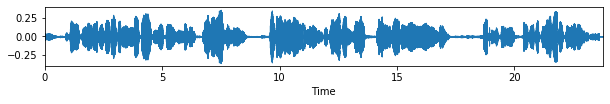

In [19]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 1.08))
librosa.display.waveplot(x, sr=sr)

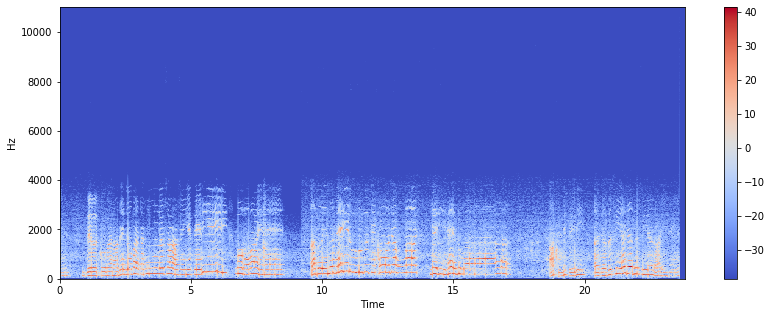

In [17]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()